In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

IMAGE_DIR = "../../data/Images"
SEG1_DIR = "../../data/Segmentation1"
SEG2_DIR = "../../data/Segmentation2"

image_dirs = {"raw":IMAGE_DIR, "seg1":SEG1_DIR, "seg2":SEG2_DIR}


def image_info(image_id, image, show_unique=False):
    print("Image id:", image_id)
    print(f"Shape: {image.shape}")
    print(f"Data type: {image.dtype}")
    print(f"Min: {image.min()}")
    print(f"Max: {image.max()}")
    if show_unique:
        print("Unique values:", np.unique(image))
    print("\n")


def show_images(image_dir, show_unique=False):
    image_files = os.listdir(image_dir)[:5]

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i, file in enumerate(image_files):
        image_path = os.path.join(image_dir, file)
        image = plt.imread(image_path)
        image_info(i, image, show_unique=show_unique)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")

    plt.show()


raw:

Image id: 0
Shape: (1300, 3100)
Data type: float32
Min: 0.0
Max: 0.9960784316062927


Image id: 1
Shape: (1220, 2914)
Data type: float32
Min: 0.0
Max: 0.9960784316062927


Image id: 2
Shape: (1150, 3138)
Data type: float32
Min: 0.0
Max: 1.0


Image id: 3
Shape: (1250, 2850)
Data type: float32
Min: 0.0
Max: 1.0


Image id: 4
Shape: (1150, 2650)
Data type: float32
Min: 0.0
Max: 1.0




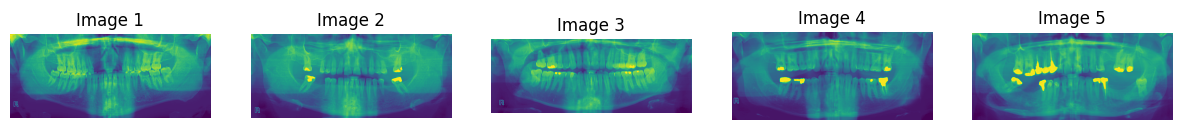

seg1:

Image id: 0
Shape: (1300, 3100)
Data type: float32
Min: 0.0
Max: 0.9725490212440491


Image id: 1
Shape: (1220, 2914)
Data type: float32
Min: 0.0
Max: 0.8274509906768799


Image id: 2
Shape: (1150, 3138)
Data type: float32
Min: 0.0
Max: 0.8745098114013672


Image id: 3
Shape: (1250, 2850)
Data type: float32
Min: 0.0
Max: 1.0


Image id: 4
Shape: (1150, 2650)
Data type: float32
Min: 0.0
Max: 1.0




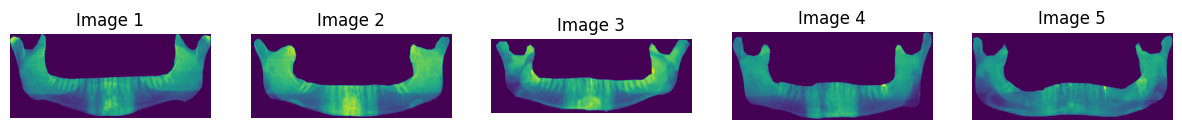

seg2:

Image id: 0
Shape: (1300, 3100)
Data type: float32
Min: 0.0
Max: 0.9725490212440491


Image id: 1
Shape: (1220, 2914)
Data type: float32
Min: 0.0
Max: 0.8274509906768799


Image id: 2
Shape: (1150, 3138)
Data type: float32
Min: 0.0
Max: 0.8745098114013672


Image id: 3
Shape: (1250, 2850)
Data type: float32
Min: 0.0
Max: 1.0


Image id: 4
Shape: (1150, 2650)
Data type: float32
Min: 0.0
Max: 1.0




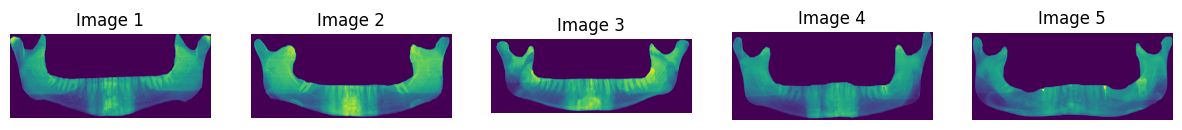

In [12]:
for name, dir in image_dirs.items():
    print(name + ":\n")
    show_images(dir)

Image id: 0
Shape: (1300, 3100)
Data type: float32
Min: 0.0
Max: 0.9725490212440491


Image id: 0
Shape: (1300, 3100)
Data type: float32
Min: 0.0
Max: 0.9725490212440491


Image id: 0
Shape: (1300, 3100)
Data type: int32
Min: 1
Max: 1
Unique values: [1]


Image id: 1
Shape: (1220, 2914)
Data type: float32
Min: 0.0
Max: 0.8274509906768799


Image id: 1
Shape: (1220, 2914)
Data type: float32
Min: 0.0
Max: 0.8274509906768799


Image id: 1
Shape: (1220, 2914)
Data type: int32
Min: 1
Max: 1
Unique values: [1]


Image id: 2
Shape: (1150, 3138)
Data type: float32
Min: 0.0
Max: 0.8745098114013672


Image id: 2
Shape: (1150, 3138)
Data type: float32
Min: 0.0
Max: 0.8745098114013672


Image id: 2
Shape: (1150, 3138)
Data type: int32
Min: 0
Max: 1
Unique values: [0 1]


Image id: 0
Shape: (1300, 3100)
Data type: float32
Min: 0.0
Max: 0.9960784316062927


Image id: 0
Shape: (1300, 3100)
Data type: float32
Min: 0.0
Max: 0.9725490212440491


Image id: 0
Shape: (1300, 3100)
Data type: int32
Min: 0
Ma

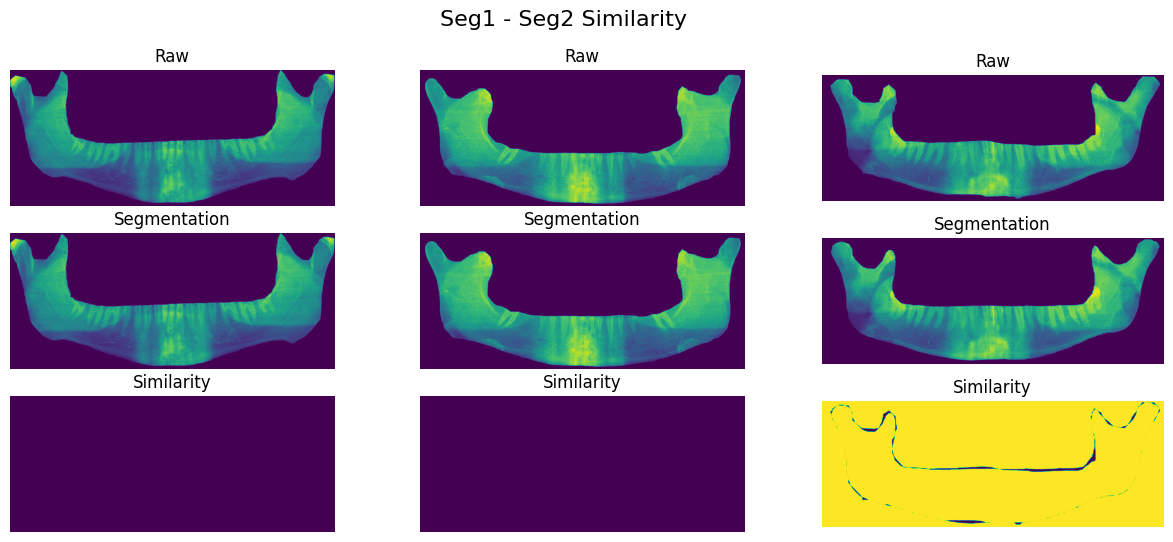

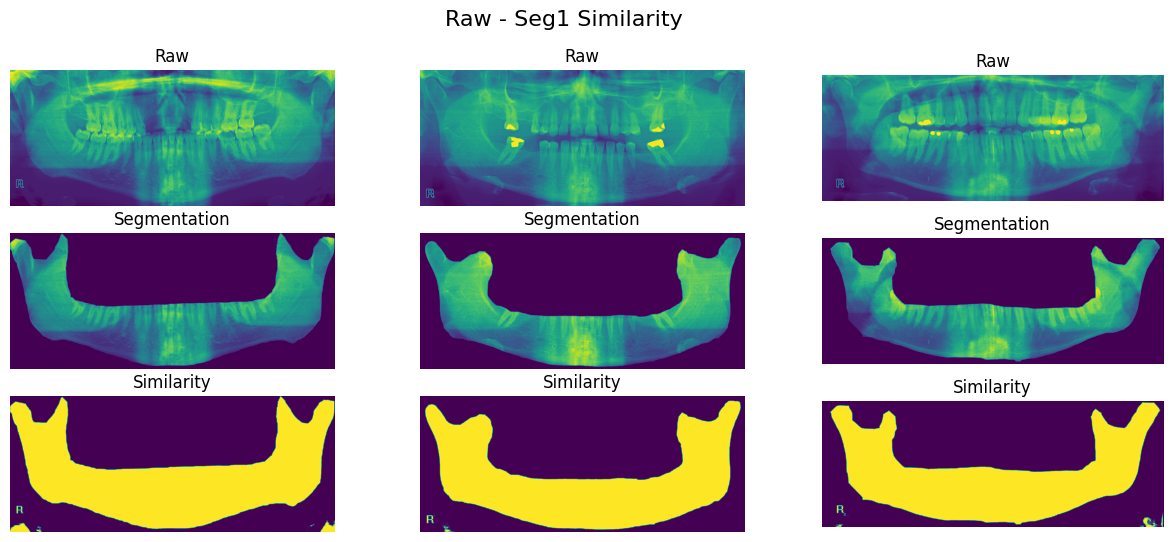

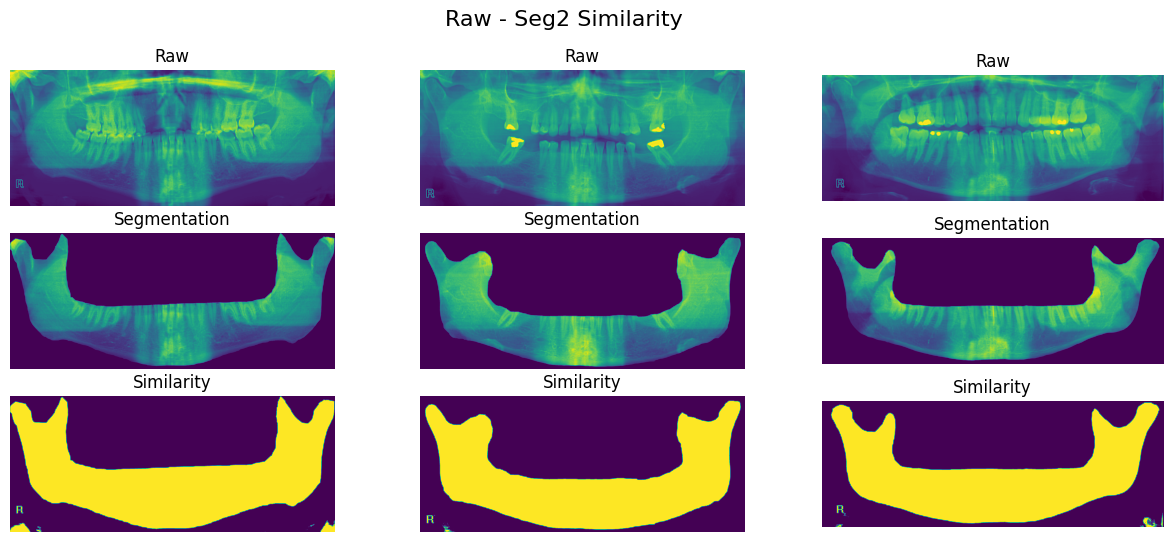

In [44]:

N = 3
skip = 0
raw_files = os.listdir(IMAGE_DIR)[skip:skip+N]
seg1_files = os.listdir(SEG1_DIR)[skip:skip+N]
seg2_files = os.listdir(SEG2_DIR)[skip:skip+N]


def show_similarity(raw_files, seg_files, location1, location2, title):
    fig, axes = plt.subplots(3, N, figsize=(15, 6))

    for i, (raw_file, segmentation_file) in enumerate(zip(raw_files, seg_files)):
        raw_path = os.path.join(location1, raw_file)
        segmentation_path = os.path.join(location2, segmentation_file)
        raw_image = plt.imread(raw_path)
        segmenation_image = plt.imread(segmentation_path)
        simmilarity_image = (raw_image == segmenation_image).astype(int)
        image_info(i, raw_image)
        image_info(i, segmenation_image)
        image_info(i, simmilarity_image, show_unique=True)
       
        fig.suptitle(title, fontsize=16)
        axes[0, i].imshow(raw_image)
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Raw")
        axes[1, i].imshow(segmenation_image)
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Segmentation")
        axes[2, i].imshow(simmilarity_image)
        axes[2, i].axis('off')
        axes[2, i].set_title(f"Similarity")

show_similarity(seg1_files, seg2_files, SEG1_DIR, SEG2_DIR, "Seg1 - Seg2 Similarity")
show_similarity(raw_files, seg1_files, IMAGE_DIR, SEG1_DIR, "Raw - Seg1 Similarity")
show_similarity(raw_files, seg2_files, IMAGE_DIR, SEG2_DIR, "Raw - Seg2 Similarity")




In [63]:
import matplotlib.pyplot as plt

def plot_image_channels(image):
    # Get the number of channels in the image
    num_channels = image.shape[2]

    # Create subplots for each channel
    fig, axes = plt.subplots(1, num_channels+3, figsize=(15, 3))

    # Plot each channel separately
    for i in range(num_channels):
        channel = image[:, :, i]
        axes[i].imshow(channel, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Channel {i+1}')
    equal_1_2 = cv2.absdiff(image[:, :, 0], image[:, :, 1])
    equal_2_3 = cv2.absdiff(image[:, :, 1], image[:, :, 2])
    equal_1_3 = cv2.absdiff(image[:, :, 0], image[:, :, 2])
    print(f"Unique differences between channels 1 and 2: {np.unique(equal_1_2)}")
    print(f"Unique differences between channels 2 and 3: {np.unique(equal_2_3)}")
    print(f"Unique differences between channels 1 and 3: {np.unique(equal_1_3)}")
    axes[num_channels].imshow(equal_1_2)
    axes[num_channels+1].imshow(equal_2_3)
    axes[num_channels+2].imshow(equal_1_3)

    plt.show()




In [69]:
N = 3
skip = 0
raw_files = os.listdir(IMAGE_DIR)[skip:skip+N]
seg1_files = os.listdir(SEG1_DIR)[skip:skip+N]
seg2_files = os.listdir(SEG2_DIR)[skip:skip+N]

for source_dir in [IMAGE_DIR, SEG1_DIR, SEG2_DIR]:
    print("Showing source", source_dir)
    for i, file in enumerate(raw_files):
        path = os.path.join(source_dir, file)
        image = cv2.imread(path, -1)
        image_info(i, image, show_unique=True)

Showing source ../../data/Images
Image id: 0
Shape: (1300, 3100)
Data type: uint8
Min: 0
Max: 254
Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 186 187 188 189 190 191 192 193 194 195 197 198 199
 200 201 202 203 205 206 207 208 209 211 212 213 214 215 217 218 219 220
 222 223 22

### Seems like all images are grayscale, with values of int8. The segmented images basically show where the mandible is.